In [463]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import networkx as nx

In [464]:
A = np.array([
    [1,1,0],
    [1,1,1],
    [0,1,1]])

# permite trabalhar com simbolos - sqrt - ao invés de ver como string, se vê como símbolo
A_sym = sp.Matrix(A)

# Polynomio caracteristico
poly_carac = A_sym.charpoly()

print (poly_carac)

print("\n\n")

# Auto valores e auto vetores

auto_valores = A_sym.eigenvals()
auto_vetores = A_sym.eigenvects()

print (f"Auto valores: {auto_valores.items()}")

print ("\n")
print (f"Auto vetores:\n{auto_vetores}")


PurePoly(lambda**3 - 3*lambda**2 + lambda + 1, lambda, domain='ZZ')



Auto valores: dict_items([(1, 1), (1 - sqrt(2), 1), (1 + sqrt(2), 1)])


Auto vetores:
[(1, 1, [Matrix([
[-1],
[ 0],
[ 1]])]), (1 - sqrt(2), 1, [Matrix([
[       1],
[-sqrt(2)],
[       1]])]), (1 + sqrt(2), 1, [Matrix([
[      1],
[sqrt(2)],
[      1]])])]


In [465]:
## Criar Polinomio em numpy:
# lambda**3 - 3*lambda**2 + lambda + 1, lambda
poly_car = np.array([1, -3., 1, 1])
auto_val = np.roots(poly_car)

print (f"\nAuto valores: {auto_val}")





Auto valores: [ 2.41421356  1.         -0.41421356]


In [466]:
# Auto valores em Numpy


auto_valores, auto_vetores = np.linalg.eigh(A)

# tira a parte imaginária
auto_valores = np.real(auto_valores)
auto_valores_imaginarios = np.imag(auto_valores)

print(f"\nAuto valores de A (sem polinomio): {auto_valores}")
print(f"\nAuto valores de A (parte imaginária): {auto_valores_imaginarios}")
print(f"\nAuto vetores de A (sem polinomio): \n{auto_vetores}")


Auto valores de A (sem polinomio): [-0.41421356  1.          2.41421356]

Auto valores de A (parte imaginária): [0. 0. 0.]

Auto vetores de A (sem polinomio): 
[[-5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -3.46944695e-17  7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


🎨 Visualizando Transformação Linear 2D
Matriz A:
[[2 1]
 [0 1]]
Autovalores: [2. 1.]
Autovetores:
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


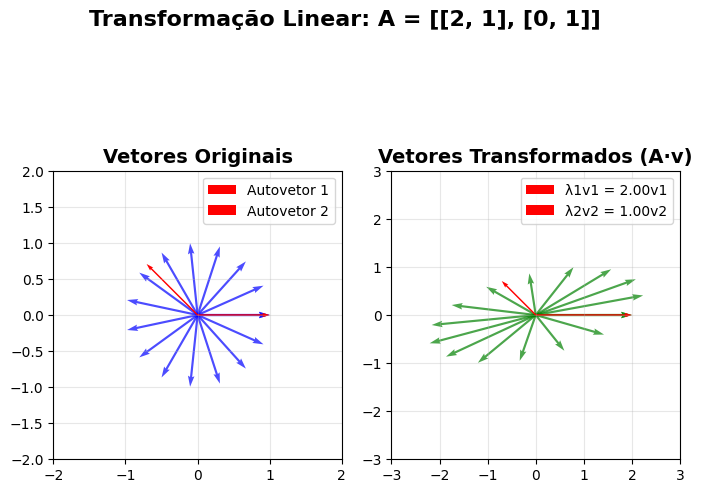

In [467]:
"""
Visualiza como uma matriz 2x2 transforma vetores
"""

print("🎨 Visualizando Transformação Linear 2D")
print("=" * 40)

A = np.array([[2, 1]
            , [0, 1]])
# Calcular autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

print(f"Matriz A:")
print(A)
print(f"Autovalores: {autovalores}")
print(f"Autovetores:\n{autovetores}")

# Criar grade de vetores
theta = np.linspace(0, 2*np.pi, 16)
vetores_originais = np.array([np.cos(theta), np.sin(theta)])

# Aplicar transformação
vetores_transformados = A @ vetores_originais

# Criar figura
fig, axes = plt.subplots(1, 2, figsize=(7,6))

# Plot 1: Vetores originais
ax1 = axes[0]
ax1.quiver(np.zeros(len(theta)), np.zeros(len(theta)), 
            vetores_originais[0], vetores_originais[1],
            angles='xy', scale_units='xy', scale=1, alpha=0.7, color='blue')

# Adicionar autovetores originais
for i, (lam, v) in enumerate(zip(autovalores, autovetores.T)):
    if np.isreal(lam):
        ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                    color='red', width=0.005, label=f'Autovetor {i+1}')

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('Vetores Originais', fontsize=14, fontweight='bold')
ax1.legend()

# Plot 2: Vetores transformados
ax2 = axes[1]
ax2.quiver(np.zeros(len(theta)), np.zeros(len(theta)), 
            vetores_transformados[0], vetores_transformados[1],
            angles='xy', scale_units='xy', scale=1, alpha=0.7, color='green')

# Adicionar autovetores transformados (escalados pelos autovalores)
for i, (lam, v) in enumerate(zip(autovalores, autovetores.T)):
    if np.isreal(lam):
        v_transformado = lam * v
        ax2.quiver(0, 0, v_transformado[0], v_transformado[1], 
                    angles='xy', scale_units='xy', scale=1,
                    color='red', width=0.005, label=f'λ{i+1}v{i+1} = {lam:.2f}v{i+1}')

# Determinar limites baseados na transformação
max_val = max(np.max(np.abs(vetores_transformados)), 3)
ax2.set_xlim(-max_val, max_val)
ax2.set_ylim(-max_val, max_val)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('Vetores Transformados (A·v)', fontsize=14, fontweight='bold')
ax2.legend()

plt.suptitle(f'Transformação Linear: A = {A.tolist()}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [468]:
"""
Aplicação: Algoritmo PageRank (Google)
"""
# Matriz de adjacência (quem aponta para quem)
# Páginas: A, B, C, D, E
paginas = ['A', 'B', 'C', 'D', 'E']
n_paginas = len(paginas)

# Links: A->B,C; B->C; C->A,B; D->B,C,E; E->A,D
adjacencia = np.array([
    [0, 1, 1, 0, 0],  # A aponta para B, C
    [0, 0, 1, 0, 0],  # B aponta para C
    [1, 1, 0, 0, 0],  # C aponta para A, B
    [0, 1, 1, 0, 1],  # D aponta para B, C, E
    [1, 0, 0, 1, 0]   # E aponta para A, D
])


print("Matriz de adjacência:")
print("   ", " ".join(paginas))
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {adjacencia[i]}")

Matriz de adjacência:
    A B C D E
A: [0 1 1 0 0]
B: [0 0 1 0 0]
C: [1 1 0 0 0]
D: [0 1 1 0 1]
E: [1 0 0 1 0]


Text(0.5, 1.0, 'Rede de Páginas Web')

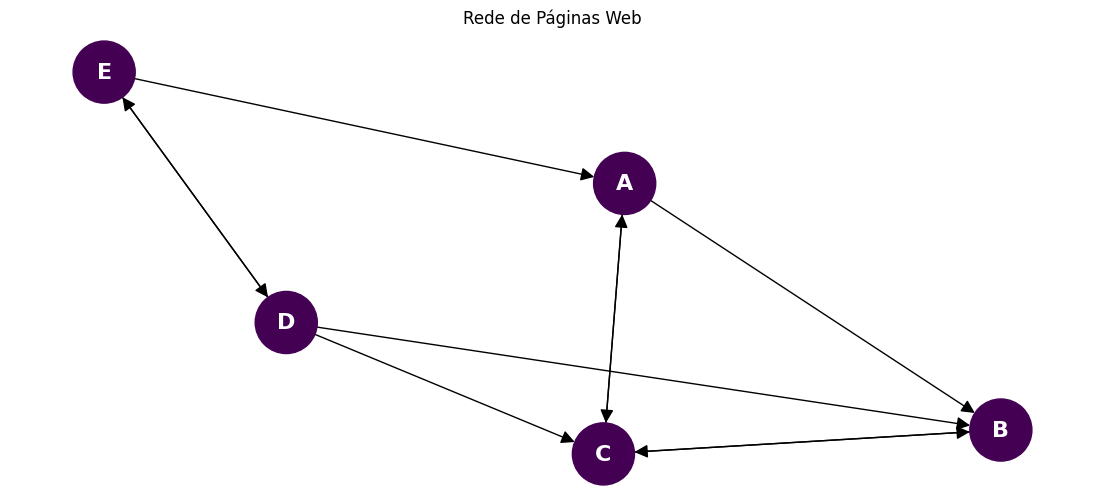

In [469]:
# Visualizar rede e resultados
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))

# Plot 1: Rede de páginas
G_nx = nx.DiGraph()

# Adicionar nós e arestas
for i, pagina in enumerate(paginas):
    G_nx.add_node(pagina)

for i in range(n_paginas):
    for j in range(n_paginas):
        if adjacencia[i, j] > 0:
            G_nx.add_edge(paginas[i], paginas[j])

# Layout e desenho
pos = nx.spring_layout(G_nx, seed=42)

# Tamanho dos nós proporcional ao PageRank
node_sizes = [2000 for i in range(adjacencia.shape[0])]
node_colors = [0.5 for i in range(adjacencia.shape[0])]

nx.draw(G_nx, pos, ax=ax1, with_labels=True, node_size=node_sizes,
        node_color=node_colors,  arrows=True, 
        arrowsize=20, font_size=16, font_weight='bold',font_color='w')
ax1.set_title('Rede de Páginas Web')


In [470]:
# Construir matriz de transição (Google Matrix)
# Normalizar por linha (probabilidade de seguir cada link)
soma_links = np.sum(adjacencia, axis=1)

# Tratar páginas sem links de saída (dangling nodes)
for i in range(n_paginas):
    if soma_links[i] == 0:
        adjacencia[i] = 1  # Aponta para todas as páginas igualmente
        soma_links[i] = n_paginas

# Matriz de transição estocástica
M = adjacencia / soma_links[:, np.newaxis]

print(f"\nMatriz de transição M:")
print(M)


Matriz de transição M:
[[0.         0.5        0.5        0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333]
 [0.5        0.         0.         0.5        0.        ]]


In [471]:
# Adicionar fator de amortecimento (damping factor) - probabilidade de seguir por um link ou seguir para outra página
d = 0.85  # Probabilidade de seguir um link
# (1-d)/n: Probabilidade de pular para qualquer página aleatoriamente



G = d * M + (1 - d) / n_paginas * np.ones((n_paginas, n_paginas))

print(f"\nGoogle Matrix G (com damping factor d={d}):")
print(G)


# somente verifica se a coluna soma 1
print(G.sum(axis=1))


Google Matrix G (com damping factor d=0.85):
[[0.03       0.455      0.455      0.03       0.03      ]
 [0.03       0.03       0.88       0.03       0.03      ]
 [0.455      0.455      0.03       0.03       0.03      ]
 [0.03       0.31333333 0.31333333 0.03       0.31333333]
 [0.455      0.03       0.03       0.455      0.03      ]]
[1. 1. 1. 1. 1.]


In [472]:
p = np.zeros((5, 1), dtype= float)
p[0] = 1
p1 = G @ p

p2 = G @ p1


# se continuar fazer essas contas, vai chegar num ponto/probabilidade de estagnação - que chega na ideia do 
# auto valor (mais próximo de 1) e auto vetor  respectivo (na coluna)


def probabilidade_estagnacao(G):
    auto_valor_g, auto_vetor_g = np.linalg.eig(G.T)
    auto_valor_g = np.real(auto_valor_g)

    print (f"\n{np.real(auto_valor_g)}\n")

    for i in range (len(auto_valor_g)):
        if np.isclose(auto_valor_g[i], 1):
            print (np.real(auto_vetor_g[:, i]))


probabilidade_estagnacao(G)




[ 1.          0.34701105 -0.425      -0.425      -0.34701105]

[-0.39605793 -0.55547787 -0.72114671 -0.08957058 -0.0806659 ]


In [473]:
# calcule os auto valores e auto vetores

A = np.array([[-1, 0], [0, -2]])
B = np.array([[1, 0], [0, 2]])
C = np.array([[0, -1], [1, 0]])
D = np.random.rand(4, 4, 4, 4)

E1 = np.random.rand(100, 100)
E = E1.T @ E1

A_autoval, A_autovetores = np.linalg.eig(A.T)
B_autoval, B_autovetores = np.linalg.eig(B.T)
C_autoval, C_autovetores = np.linalg.eig(C.T)
D_autoval, D_autovetores = np.linalg.eig(D.T)

print (f"\nA - autovalores: {A_autoval}")

print (f"\nA - autovetores: {A_autovetores}")

print (f"\nB - autovalores: {B_autoval}")

print (f"\nB - autovetores: {B_autovetores}")

print (f"\nC - autovalores: {C_autoval}")

print (f"\nC - autovetores: {C_autovetores}")

print (f"\nD - autovalores: {D_autoval}")

print (f"\nD - autovetores: {D_autovetores}")





A - autovalores: [-1. -2.]

A - autovetores: [[1. 0.]
 [0. 1.]]

B - autovalores: [1. 2.]

B - autovetores: [[1. 0.]
 [0. 1.]]

C - autovalores: [0.+1.j 0.-1.j]

C - autovetores: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]

D - autovalores: [[[ 2.03181228+0.j         -0.54951959+0.17804784j
   -0.54951959-0.17804784j  0.23434291+0.j        ]
  [ 2.64253056+0.j         -0.28218339+0.j
    0.12720565+0.19107652j  0.12720565-0.19107652j]
  [ 1.84067919+0.j          0.43794233+0.j
   -0.34810001+0.12923337j -0.34810001-0.12923337j]
  [ 2.34738998+0.j         -0.1389714 +0.j
    0.12171303+0.25232556j  0.12171303-0.25232556j]]

 [[ 1.69840557+0.j          0.74836152+0.j
   -0.04624199+0.30227845j -0.04624199-0.30227845j]
  [ 1.98598536+0.j         -1.06505773+0.j
   -0.02296276+0.j          0.36262273+0.j        ]
  [ 1.95495299+0.j         -0.05700674+0.j
   -0.44822284+0.28714029j -0.44822284-0.28714029j]
  [ 1.79785322+0.j         -